
# Startup-Acquisition-Status-Prediction.

In [1]:
#import necessary libraries  
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
# to display all columns
pd.set_option('display.max_columns', None)

In [103]:
company = pd.read_csv("D:\\technocalobs\\2nd project\\Data_companies\\companies.csv")
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
describecompany.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
company.shape

(196553, 44)

A. Data Cleaning

Delete irrelevant & redundant information

Remove noise or unreliable data (missing values and outliers)

1. Delete irrelevant and redundant information

Delete 'region','city','state_code' as they provide too much of granularity.

Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',

'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',

'invested_companies' as they are irrelevant features.

Delete those which has more than 98% of null values.


In [6]:
company.drop(['region','city','state_code'], axis=1,inplace=True)
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)
company.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)

In [7]:
# Since we can see only nan values so let's check how much of ros has nan values.
percent_missing = company. isnull(). sum() * 100 / len(company)
print("percentage of nan in each columns:")
percent_missing.sort_values()

percentage of nan in each columns:


status                  0.000000
relationships          34.029498
category_code          37.326828
milestones             53.346426
last_milestone_at      53.346426
first_milestone_at     53.346426
founded_at             53.586564
country_code           55.233448
lat                    57.338733
lng                    57.338733
funding_rounds         83.868473
last_funding_at        83.970227
first_funding_at       83.970227
funding_total_usd      85.818583
closed_at              98.667026
investment_rounds      98.681780
last_investment_at     98.685851
first_investment_at    98.685851
ROI                    99.630634
dtype: float64

In [8]:
# Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], axis=1,inplace=True)

In [9]:
company.shape

(196553, 15)

In [10]:
company.isna().sum()

category_code          73367
status                     0
founded_at            105326
closed_at             193933
country_code          108563
first_funding_at      165046
last_funding_at       165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
relationships          66886
lat                   112701
lng                   112701
dtype: int64

In [11]:
# Drop missing values
company.dropna(subset=['category_code', 'status', 'founded_at', 'country_code', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships','lat', 'lng'], inplace=True)

In [12]:
company.shape


(12327, 15)

In [19]:
company.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,10405.000000,1.040500e+04,10405.000000,10405.000000,10405.000000,10405.000000
mean,1.831716,6.521776e+06,1.612206,5.123402,38.569066,-66.152293
std,1.139464,8.971708e+06,0.813090,3.764981,13.448626,63.010678
min,1.000000,2.910000e+02,1.000000,1.000000,-42.883611,-158.056896
25%,1.000000,5.000000e+05,1.000000,2.000000,37.338208,-121.886329
50%,1.000000,2.250000e+06,1.000000,4.000000,39.103118,-80.244216
75%,2.000000,9.115000e+06,2.000000,7.000000,43.653226,-3.703790
max,15.000000,4.026850e+07,9.000000,17.000000,70.919200,174.776236


In [20]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at']=pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at']=pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# first_milestone_at
company['first_milestone_at']=pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year


# last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company.dtypes

category_code          object
status                 object
founded_at              int32
closed_at             float64
country_code           object
first_funding_at        int32
last_funding_at         int32
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      int32
last_milestone_at       int32
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [92]:
company.duplicated().sum()

0

In [22]:
company.category_code.value_counts()

category_code
software            1735
web                 1204
mobile               973
enterprise           798
ecommerce            656
advertising          578
games_video          525
biotech              348
analytics            341
social               302
hardware             237
education            219
finance              199
cleantech            174
security             157
other                155
network_hosting      153
health               148
search               137
public_relations     131
messaging            114
travel               113
medical              104
fashion               92
consulting            92
semiconductor         91
news                  85
music                 84
hospitality           80
photo_video           65
real_estate           61
sports                51
manufacturing         48
nonprofit             33
automotive            29
transportation        24
design                22
legal                 21
pets                  10
nanotech   

In [23]:
# category_encoading
category_others_index = company.category_code.value_counts()[14:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [24]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


category_code
other          2116
software       1735
web            1204
mobile          973
enterprise      798
ecommerce       656
advertising     578
games_video     525
biotech         348
analytics       341
social          302
hardware        237
education       219
finance         199
cleantech       174
Name: count, dtype: int64

In [26]:
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

Create new variables¶

Create new feature isClosed from closed_at and status.

Create new feature 'active_days'

1. Create new feature isClosed from closed_at and status

if the value in status is 'operating' or 'ipo', Let's put 0.

Where as if the value is 'acquired' or 'closed', let's put 1.

In [29]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 0
    else:
        return 1
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,NaN,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0
13,web,acquired,2007,NaN,USA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
20,cleantech,operating,2003,NaN,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0
26,mobile,operating,2003,NaN,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0
45,enterprise,operating,2004,NaN,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1
196537,social,operating,2011,NaN,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0
196540,games_video,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1
196549,other,operating,2007,NaN,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0


In [40]:
company.drop(columns=['status','closed_at'], inplace = True)

In [41]:
company.to_csv('final_company', index=False)

# EDA

# 1. Univariate Analysis.

2. Bivariate Analysis

3. Multivariate Analysis

In [94]:
company.head()

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
1,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
2,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
3,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
4,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0


# Univariate Analysis.

In [42]:
company.describe()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,9321.000000,9321.000000,9321.000000,9321.000000,9.321000e+03,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000
mean,2007.967707,2010.369596,2011.314666,1.821693,6.118446e+06,2010.393949,2011.068018,1.564639,4.986804,38.451869,-63.883144,0.064263,4537.888639
std,5.474789,2.365156,2.029823,1.147850,8.782050e+06,2.911082,2.725316,0.774133,3.709942,13.927531,64.110249,0.245235,2141.460773
min,1908.000000,1994.000000,1994.000000,1.000000,2.910000e+02,1976.000000,1976.000000,1.000000,1.000000,-42.883611,-158.056896,0.000000,-3285.000000
25%,2007.000000,2009.000000,2011.000000,1.000000,4.055290e+05,2010.000000,2010.000000,1.000000,2.000000,37.229573,-120.740139,0.000000,3650.000000
50%,2010.000000,2011.000000,2012.000000,1.000000,2.000000e+06,2011.000000,2012.000000,1.000000,4.000000,39.569600,-79.931051,0.000000,4015.000000
75%,2011.000000,2012.000000,2013.000000,2.000000,8.100000e+06,2012.000000,2013.000000,2.000000,7.000000,43.653226,-1.404351,0.000000,5110.000000
max,2014.000000,2013.000000,2013.000000,15.000000,4.026850e+07,2014.000000,2014.000000,9.000000,17.000000,70.919200,174.776236,1.000000,41245.000000


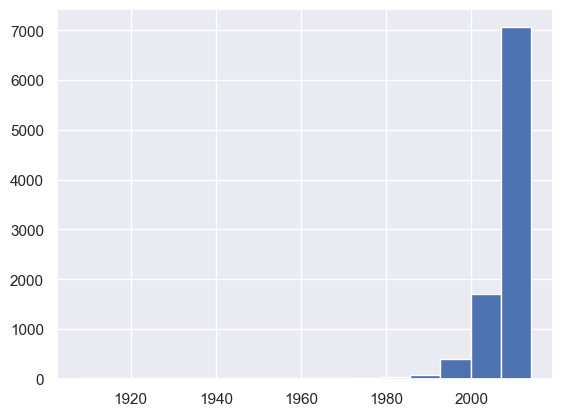

In [44]:
plt.hist(company['founded_at'], bins=15)
plt.show()

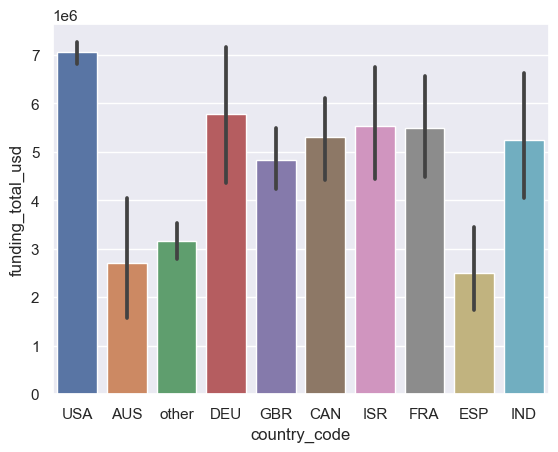

In [48]:
import seaborn as sns
sns.barplot(x=company['country_code'], y=company['funding_total_usd'])
plt.show()

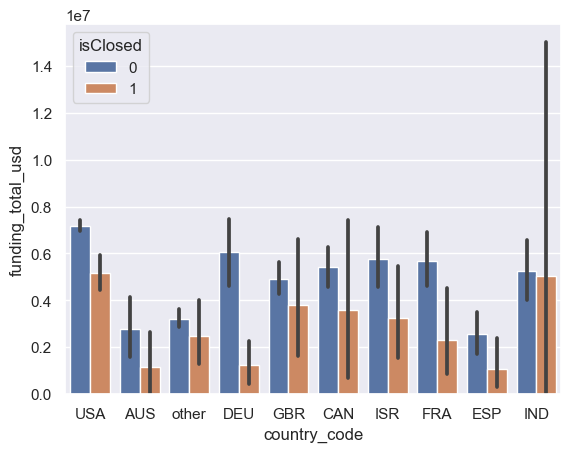

In [50]:
import seaborn as sns
sns.barplot(x=company['country_code'], y=company['funding_total_usd'], hue=company["isClosed"])
plt.show()

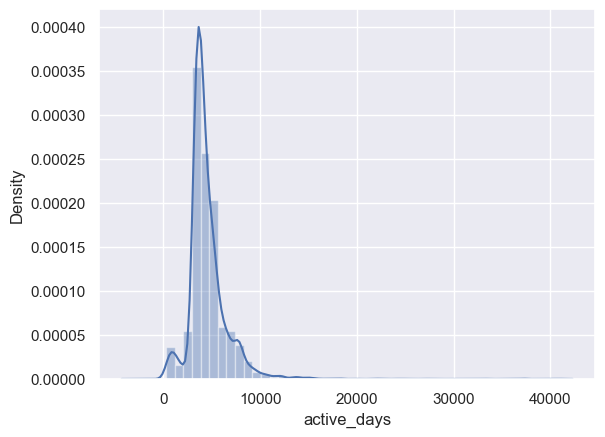

In [51]:
sns.distplot(company['active_days']) 
plt.show()

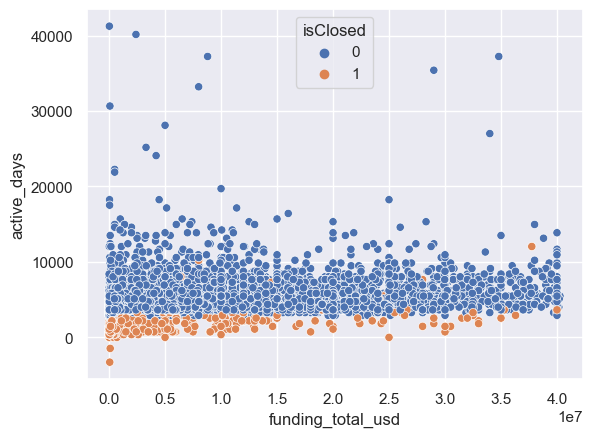

In [53]:
import seaborn as sns
sns.scatterplot(x=company["funding_total_usd"], y=company["active_days"], hue=company["isClosed"])
plt.show()

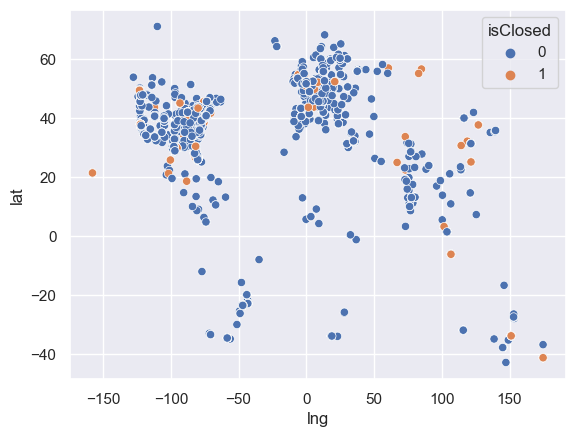

In [55]:
import seaborn as sns
sns.scatterplot(x=company["lng"], y=company["lat"], hue=company["isClosed"])
plt.show()

In [56]:
company

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
20,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
26,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
45,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
48,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0
196537,social,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0
196540,games_video,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0
196549,other,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0


# ---------------------------------------------------------------------------------------------------------------

In [57]:
#import necessary libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [58]:
company = pd.read_csv('final_company')

In [59]:
company.sample(50)

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
28,enterprise,2000,USA,2007,2010,3.0,12322500.0,2010,2013,3.0,16.0,42.610648,-71.234225,0,7665.0
321,cleantech,2007,USA,2008,2008,1.0,2300000.0,2007,2008,2.0,2.0,37.630490,-122.411084,1,1460.0
7934,other,2010,USA,2011,2011,1.0,1200000.0,2010,2011,2.0,1.0,37.441883,-122.143019,0,4015.0
911,other,2007,USA,2012,2012,1.0,30000000.0,1998,1998,1.0,1.0,41.839787,-87.953553,0,5110.0
5034,ecommerce,2009,USA,2012,2012,1.0,750000.0,2009,2014,2.0,1.0,43.083130,-73.784565,0,4380.0
951,other,2011,USA,2011,2011,1.0,200000.0,2011,2011,1.0,4.0,40.678178,-73.944158,0,3650.0
7843,web,2011,USA,2012,2012,3.0,2510000.0,2012,2013,3.0,9.0,41.878114,-87.629798,0,3650.0
2365,mobile,2011,USA,2012,2012,1.0,118000.0,2012,2012,1.0,3.0,37.774929,-122.419415,0,3650.0
2162,social,2011,USA,2013,2013,2.0,2063960.0,2013,2013,2.0,5.0,38.232417,-122.636652,0,3650.0
5881,games_video,2008,other,2009,2009,1.0,1500000.0,2008,2011,3.0,2.0,39.904200,116.407396,0,4745.0


Corelation and Multicolinarity

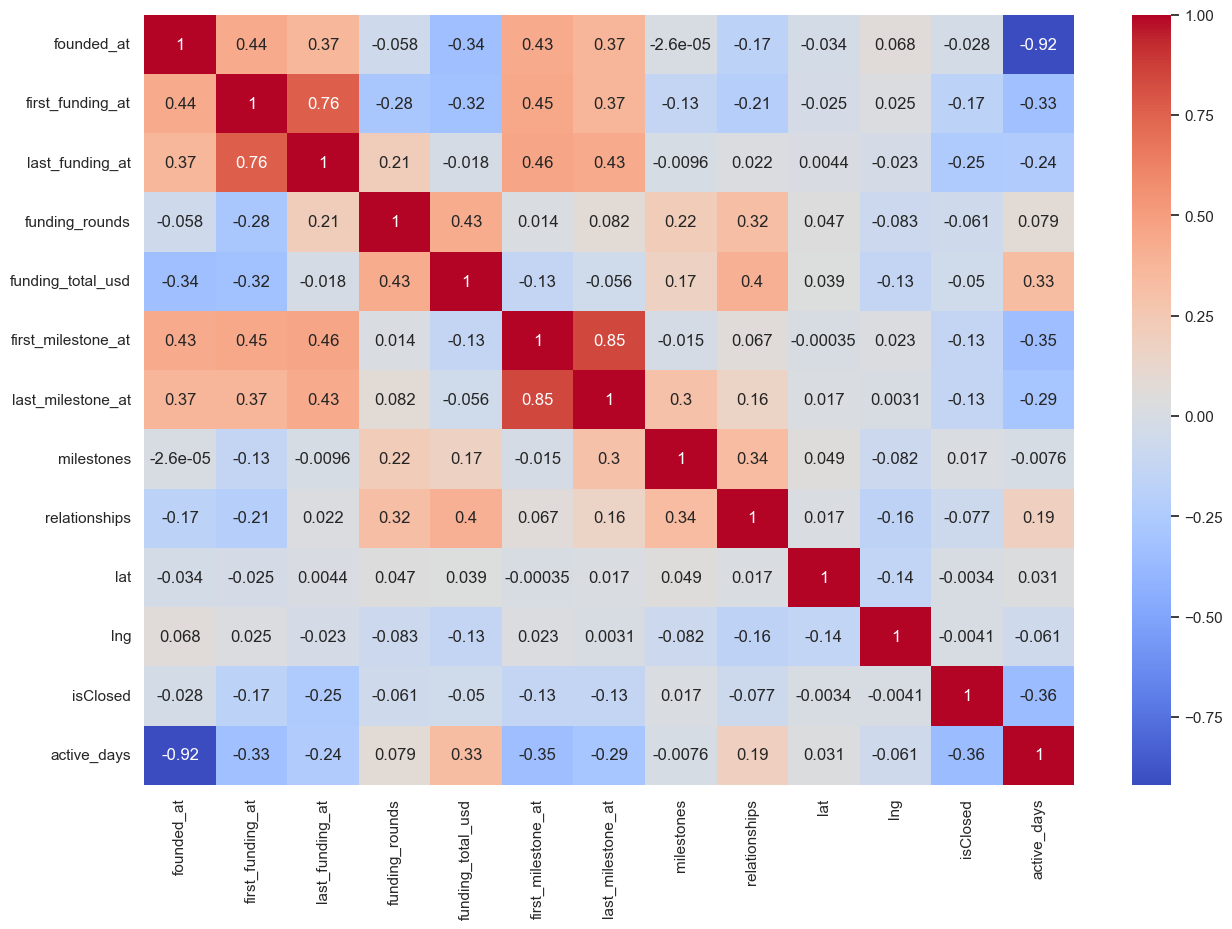

In [61]:
#Using Pearson Correlation
numerical_columns = company.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))
cor = numerical_columns.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()


In [62]:
cor["isClosed"].sort_values(ascending=False)

isClosed              1.000000
milestones            0.016832
lat                  -0.003354
lng                  -0.004084
founded_at           -0.028183
funding_total_usd    -0.050217
funding_rounds       -0.061061
relationships        -0.077139
last_milestone_at    -0.125180
first_milestone_at   -0.130754
first_funding_at     -0.174515
last_funding_at      -0.246476
active_days          -0.363778
Name: isClosed, dtype: float64

In [63]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [64]:
vif_df = company.drop(["isClosed",'category_code','country_code'], axis=1)

In [65]:
calc_vif(vif_df)

,variables,VIF
0,founded_at,8.765222e+05
1,first_funding_at,3.693328e+06
2,last_funding_at,4.365378e+06
3,funding_rounds,7.375689e+00
4,funding_total_usd,2.298635e+00
5,first_milestone_at,2.479594e+06
6,last_milestone_at,2.847642e+06
7,milestones,8.597062e+00
8,relationships,4.000309e+00
9,lat,8.827071e+00


In [66]:
X = company.drop(["isClosed",'category_code','country_code','last_milestone_at','first_funding_at','founded_at','last_funding_at','first_milestone_at'], axis=1)

In [67]:
calc_vif(X)

,variables,VIF
0,funding_rounds,4.242621
1,funding_total_usd,2.105807
2,milestones,5.074618
3,relationships,3.830639
4,lat,5.775304
5,lng,2.081721
6,active_days,4.761166


In [68]:
# company = company.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

one hot encoading


In [69]:
company

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
1,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
2,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
3,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
4,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,mobile,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0
9317,social,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0
9318,games_video,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0
9319,other,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0


In [70]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.category_code, prefix='category', drop_first=True)
dummies

,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9317,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9318,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9319,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [71]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,mobile,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9317,social,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9318,games_video,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9319,other,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [72]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['category_code'], axis=1,inplace=True)

In [73]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.country_code, prefix='country', drop_first=True)
dummies

,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9316,False,False,False,False,False,False,False,True,False
9317,True,False,False,False,False,False,False,False,False
9318,False,False,False,False,False,False,False,True,False
9319,False,False,False,False,False,False,False,True,False


In [74]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
9317,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
9318,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9319,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [75]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['country_code'], axis=1,inplace=True)

In [76]:
company

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,2005,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,2003,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2003,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2004,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,2006,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,2008,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
9317,2011,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
9318,2006,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9319,2007,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [77]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts()[0]/y_test.value_counts()[1])

(7456, 35)
(1865, 35)
14.565762004175365
14.541666666666666


# Model Building


XG Boost

Random Forest

Logistic Regression

SVM

# XG Boost


In [80]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb_clf_predict = xgb_clf.predict(X_train)
print(confusion_matrix(y_train,xgb_clf_predict))
print(accuracy_score(y_train,xgb_clf_predict))
print(classification_report(y_train,xgb_clf_predict))

[[6977    0]
 [   0  479]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00       479

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [82]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb_clf_predict = xgb_clf.predict(X_test)
print(confusion_matrix(y_test,xgb_clf_predict))
print(accuracy_score(y_test,xgb_clf_predict))
print(classification_report(y_test,xgb_clf_predict))

[[1744    1]
 [   0  120]]
0.9994638069705094
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1745
           1       0.99      1.00      1.00       120

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_clf_predict = rf_clf.predict(X_train)
print(confusion_matrix(y_train,rf_clf_predict))
print(accuracy_score(y_train,rf_clf_predict))
print(classification_report(y_train,rf_clf_predict))

[[6977    0]
 [   0  479]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00       479

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [85]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_clf_predict = rf_clf.predict(X_test)
print(confusion_matrix(y_test,rf_clf_predict))
print(accuracy_score(y_test,rf_clf_predict))
print(classification_report(y_test,rf_clf_predict))

[[1745    0]
 [   9  111]]
0.9951742627345844
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1745
           1       1.00      0.93      0.96       120

    accuracy                           1.00      1865
   macro avg       1.00      0.96      0.98      1865
weighted avg       1.00      1.00      1.00      1865



# SVM

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [87]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_train)
print(confusion_matrix(y_train,svc_predict))
print(accuracy_score(y_train,svc_predict))
print(classification_report(y_train,svc_predict))

[[6977    0]
 [ 479    0]]
0.9357564377682404
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6977
           1       0.00      0.00      0.00       479

    accuracy                           0.94      7456
   macro avg       0.47      0.50      0.48      7456
weighted avg       0.88      0.94      0.90      7456



In [88]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_test)
print(confusion_matrix(y_test,svc_predict))
print(accuracy_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

[[1745    0]
 [ 120    0]]
0.935656836461126
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1745
           1       0.00      0.00      0.00       120

    accuracy                           0.94      1865
   macro avg       0.47      0.50      0.48      1865
weighted avg       0.88      0.94      0.90      1865



In [89]:
company = pd.read_csv('final_company')

In [90]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)